In [1]:
import numpy as np 
import pandas as pd 
import os

TITANIC_DATA_PATH = "train.csv"

titanic_dataset = pd.read_csv(TITANIC_DATA_PATH)

## Learning the dataset

In [2]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
import matplotlib.pyplot as plt
# titanic_dataset.hist(bins=50, figsize=(20,15))
# plt.show()

## Splitting the data stratisfiedly, based on survivors

In [6]:
titanic_dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index in sss.split(titanic_dataset, titanic_dataset["Survived"]):
    strat_train_set = titanic_dataset.loc[train_index]
    strat_test_set = titanic_dataset.loc[test_index]

In [8]:
strat_test_set['Survived'].value_counts()

Survived
0    110
1     69
Name: count, dtype: int64

In [9]:
titanic_dataset = strat_train_set.copy()

In [10]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          575 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


## Separating data and label

In [11]:
titanic_dataset_prepared = titanic_dataset.drop("Survived", axis=1)
titanic_dataset_label = titanic_dataset["Survived"].copy()
titanic_dataset_label

692    1
481    0
527    0
855    1
801    1
      ..
359    1
258    1
736    0
462    0
507    1
Name: Survived, Length: 712, dtype: int64

In [12]:
titanic_dataset_prepared["Embarked"].isna().sum()

np.int64(2)

## Pipeline

In [13]:
def simplify_title(title):
    if title in ['Mlle', 'Ms', 'Miss']:
        return 'Miss'
    elif title in ['Mme', 'Mrs']:
        return 'Mrs'
    elif title == 'Mr':
        return 'Mr'
    else:
        return 'Rare'

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomAttributeTransformer(BaseEstimator, TransformerMixin):
    def _init_(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, data):
        data.drop(columns=['Ticket'], inplace=True)
        data.drop(columns=['Cabin'], inplace=True)
    
        # Change name into title
        data['Title'] = data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
        # print(data['Title'].value_counts())
        data['Title'] = data['Title'].apply(simplify_title)
        data['Sex'] = (
        data['Sex']
        .str.strip()
        .str.lower()
        .map({'male': 1, 'female': 0})
    )
        data.drop(columns=['Name'], inplace=True)
        return data

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [ ]:
# # # Okay so custom works perfectly
# custom = CustomAttributeTransformer()
# custom.transform(titanic_dataset_prepared)
# titanic_dataset_prepared

In [17]:
from sklearn.compose import ColumnTransformer
num_attribs = list(titanic_dataset_prepared.select_dtypes(include="number").columns) + ["Sex"]
print(num_attribs)

cat_attribs = ["Title"]

full_pipeline = Pipeline([
    ('custom', CustomAttributeTransformer()),
    ('preprocess', ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
    ]))  
])

titanic_dataset_train = full_pipeline.fit_transform(titanic_dataset_prepared)
titanic_dataset_train

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']


array([[ 0.96622201,  0.82956755, -0.08113533, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.1461187 , -0.37094484, -0.08113533, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.324909  , -1.57145722, -0.08113533, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.13723882,  0.82956755,  1.41700669, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07227054, -1.57145722,  1.34017889, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.24717409, -1.57145722, -0.08113533, ...,  1.        ,
         0.        ,  0.        ]], shape=(712, 14))

In [18]:
ct = full_pipeline.named_steps['preprocess']
titanic_dataset = pd.DataFrame(
    titanic_dataset_train, columns= ct.get_feature_names_out(), index=titanic_dataset_prepared.index
)
titanic_dataset

,num__PassengerId,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,num__Sex,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Title_Miss,cat__Title_Mr,cat__Title_Mrs,cat__Title_Rare
692,0.966222,0.829568,-0.081135,-0.465084,-0.466183,0.513812,0.742427,0.0,0.0,1.0,0.0,1.0,0.0,0.0
481,0.146119,-0.370945,-0.081135,-0.465084,-0.466183,-0.662563,0.742427,0.0,0.0,1.0,0.0,1.0,0.0,0.0
527,0.324909,-1.571457,-0.081135,-0.465084,-0.466183,3.955399,0.742427,0.0,0.0,1.0,0.0,1.0,0.0,0.0
855,1.599762,0.829568,-0.887827,-0.465084,0.727782,-0.467874,-1.346933,0.0,0.0,1.0,0.0,0.0,1.0,0.0
801,1.389877,-0.370945,0.110934,0.478335,0.727782,-0.115977,-1.346933,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,-0.328064,0.829568,-0.081135,-0.465084,-0.466183,-0.498500,-1.346933,0.0,1.0,0.0,1.0,0.0,0.0,0.0
258,-0.720626,-1.571457,0.418245,-0.465084,-0.466183,10.005329,-1.346933,1.0,0.0,0.0,1.0,0.0,0.0,0.0
736,1.137239,0.829568,1.417007,0.478335,3.115713,0.053205,-1.346933,0.0,0.0,1.0,0.0,0.0,1.0,0.0
462,0.072271,-1.571457,1.340179,-0.465084,-0.466183,0.139097,0.742427,0.0,0.0,1.0,0.0,1.0,0.0,0.0


array([[<Axes: title={'center': 'num__PassengerId'}>,
        <Axes: title={'center': 'num__Pclass'}>,
        <Axes: title={'center': 'num__Age'}>,
        <Axes: title={'center': 'num__SibSp'}>],
       [<Axes: title={'center': 'num__Parch'}>,
        <Axes: title={'center': 'num__Fare'}>,
        <Axes: title={'center': 'num__Sex'}>,
        <Axes: title={'center': 'cat__Embarked_C'}>],
       [<Axes: title={'center': 'cat__Embarked_Q'}>,
        <Axes: title={'center': 'cat__Embarked_S'}>,
        <Axes: title={'center': 'cat__Title_Miss'}>,
        <Axes: title={'center': 'cat__Title_Mr'}>],
       [<Axes: title={'center': 'cat__Title_Mrs'}>,
        <Axes: title={'center': 'cat__Title_Rare'}>, <Axes: >, <Axes: >]],
      dtype=object)

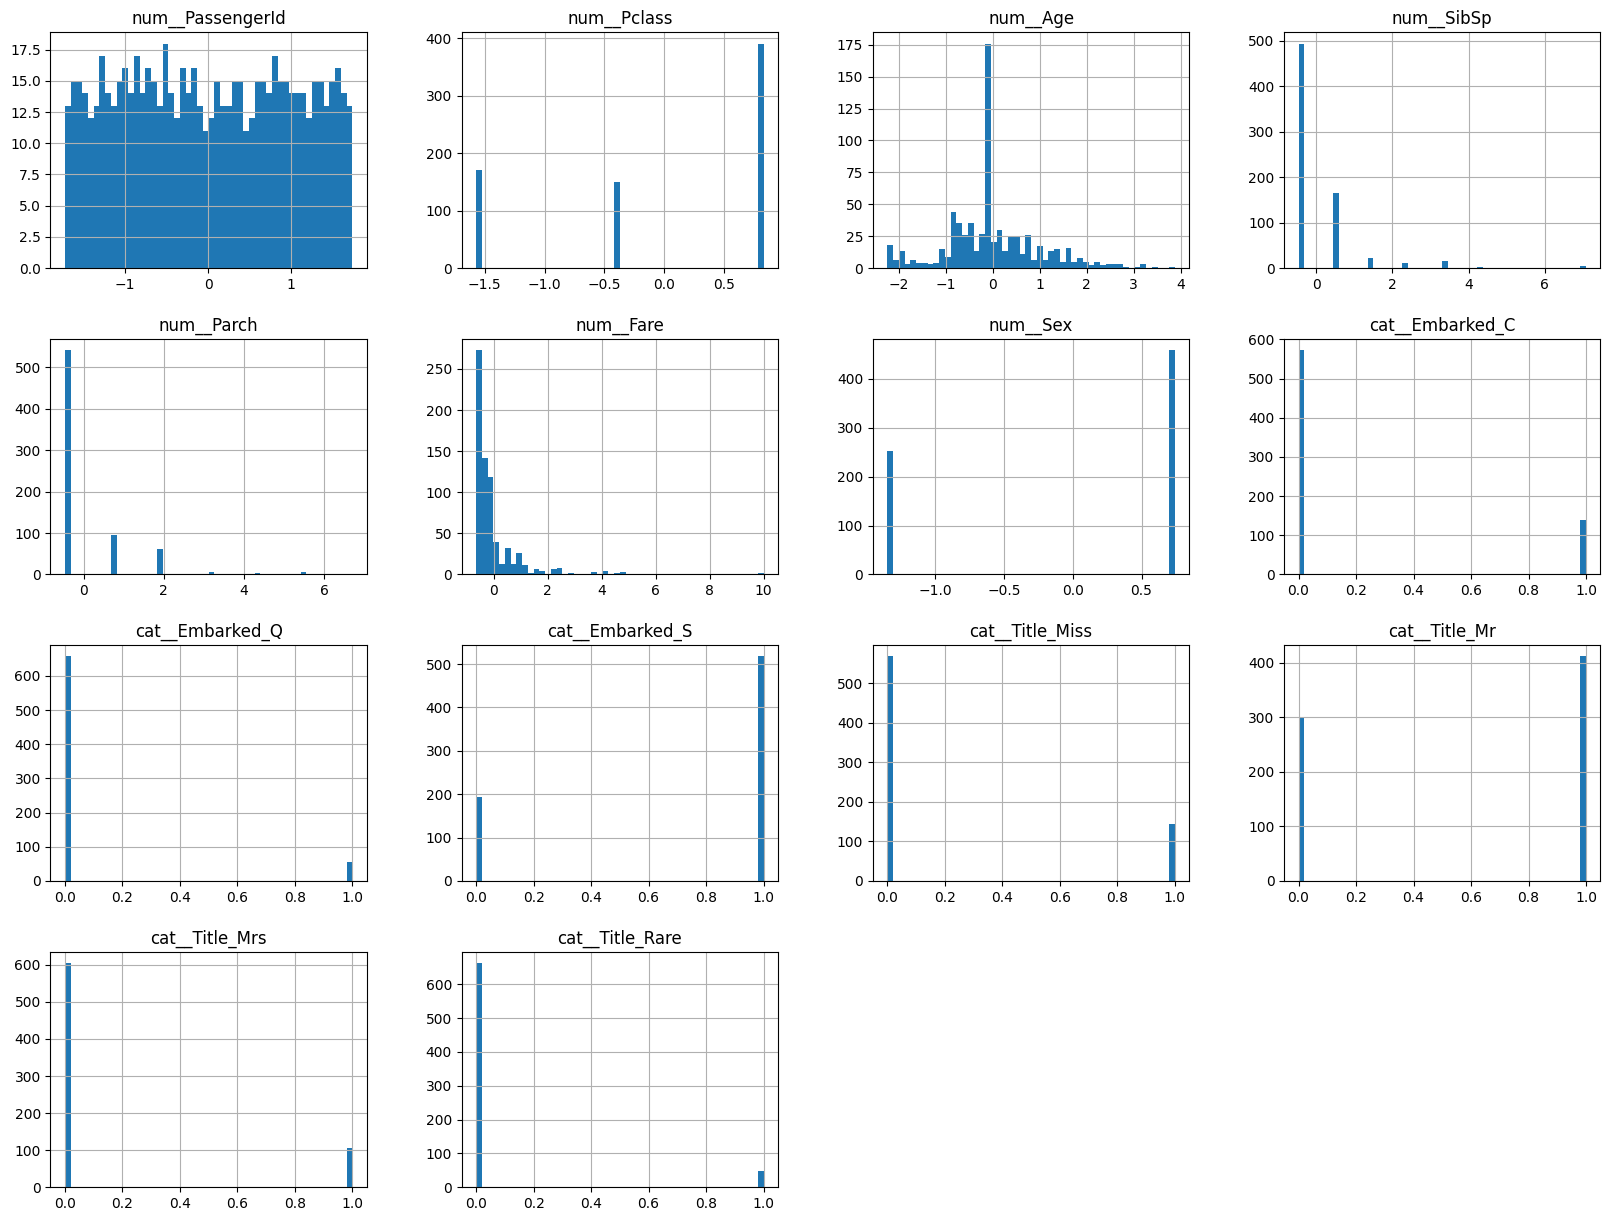

In [19]:
titanic_dataset.hist(bins=50, figsize=(20,15))

## Training a model (Decision Tree, Random Forest, Logistic Regression)

In [20]:
# # Okay maybe let's not use linear regression, since the result it's not regression type it's classification
from sklearn.linear_model import LogisticRegression
# # titanic_dataset_prepared dataset buat latihan
# # titanic_dataset_label buat label
log_reg = LogisticRegression()
log_reg.fit(titanic_dataset, titanic_dataset_label)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree_class = DecisionTreeClassifier()
tree_class.fit(titanic_dataset, titanic_dataset_label)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [22]:
from sklearn.ensemble import RandomForestClassifier

rd_forest = RandomForestClassifier()
rd_forest.fit(titanic_dataset, titanic_dataset_label)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [23]:
some_data = titanic_dataset.iloc[:5]
some_labels = titanic_dataset_label.iloc[:5]

print("Predictions:", tree_class.predict(some_data))
print("Labels: ", list(some_labels))
# some_data_prepared = full_pipeline.transform(some_data)

Predictions: [1 0 0 1 1]
Labels:  [1, 0, 0, 1, 1]


### This is overfitting, since we are training and model evaluating using the same data

## Cross Validating with every model

In [24]:
from sklearn.model_selection import cross_val_score

dec_tree_scores = cross_val_score(tree_class, titanic_dataset, titanic_dataset_label, scoring="accuracy", cv=8)
print("Scores:", dec_tree_scores)

Scores: [0.76404494 0.69662921 0.71910112 0.75280899 0.75280899 0.73033708
 0.73033708 0.78651685]


In [25]:
rd_scores = cross_val_score(rd_forest, titanic_dataset, titanic_dataset_label, scoring="accuracy", cv=8)
print("Scores:", rd_scores)

Scores: [0.76404494 0.80898876 0.79775281 0.82022472 0.82022472 0.8988764
 0.76404494 0.82022472]


In [26]:
log_reg_scores = cross_val_score(log_reg, titanic_dataset, titanic_dataset_label, scoring="accuracy", cv=8)
print("Scores:", log_reg_scores)

Scores: [0.7752809  0.79775281 0.76404494 0.86516854 0.84269663 0.82022472
 0.80898876 0.83146067]


## Grid Search (Decision Tree)

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    "max_depth": [None, 3, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": [None, "sqrt", "log2"],
    "criterion": ["gini", "entropy"]
}

dec_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(dec_tree, param_grid_dt, cv=5, scoring="accuracy", return_train_score=True, n_jobs=-1)
grid_search.fit(titanic_dataset, titanic_dataset_label)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fol

In [28]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [29]:
grid_search.best_score_

np.float64(0.8286713286713286)

In [30]:
cvres = grid_search.cv_results_
for score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(score, params)

0.748557076726091 {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.7640500344725696 {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.7711316852161922 {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.7640204865556979 {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.7570274795626908 {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.7612626809809908 {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.7795331429134247 {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.7837584950261007 {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_l

## Randomized Grid Search (Random Forest)

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(3, 30),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", None]
}

forest_clf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    forest_clf,
    param_dist,
    n_iter=50,
    scoring="accuracy",
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [32]:
random_search.fit(titanic_dataset, titanic_dataset_label)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': <scipy.stats....0020101DBB200>, 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': <scipy.stats....00201030F2C30>, 'min_samples_split': <scipy.stats....00201030F2A80>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` f

In [33]:
random_search.best_params_

{'max_depth': 21,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 13,
 'n_estimators': 317}

In [34]:
random_search.best_score_

np.float64(0.8301093272924259)

## Grid Search (Logistic Regression)

In [35]:
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],  # lbfgs supports only l2 or none
    "solver": ["lbfgs"],  
    "max_iter": [500, 1000]
}

lr_clf = LogisticRegression(random_state=42)

In [36]:
grid_lr = GridSearchCV(
    lr_clf,
    param_grid_lr,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_lr.fit(titanic_dataset, titanic_dataset_label)

print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.811878262582488


D:\Programming\titanic\titanic\my_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [37]:
models = {
    "Decision Tree": grid_search.best_score_,
    "Random Forest": random_search.best_score_,
    "Logistic Regression": grid_lr.best_score_
}

models

{'Decision Tree': np.float64(0.8286713286713286),
 'Random Forest': np.float64(0.8301093272924259),
 'Logistic Regression': np.float64(0.811878262582488)}

## Checking feature importances

In [38]:
# Decision Tree
importances = grid_search.best_estimator_.feature_importances_
feature_names = titanic_dataset.columns  # or the columns after preprocessing
feat_importances_dt = pd.Series(importances, index=feature_names)
feat_importances_dt.sort_values(ascending=False)

cat__Title_Mr       0.356184
cat__Title_Mrs      0.327123
num__Fare           0.172791
cat__Title_Miss     0.092714
num__Parch          0.048891
num__SibSp          0.002297
num__Age            0.000000
num__Pclass         0.000000
num__PassengerId    0.000000
num__Sex            0.000000
cat__Embarked_S     0.000000
cat__Embarked_Q     0.000000
cat__Embarked_C     0.000000
cat__Title_Rare     0.000000
dtype: float64

In [39]:
# Random Forest
importances = random_search.best_estimator_.feature_importances_
feature_names = titanic_dataset.columns  # or the columns after preprocessing
feat_importances_dt = pd.Series(importances, index=feature_names)
feat_importances_dt.sort_values(ascending=False)

cat__Title_Mr       0.185757
num__Sex            0.174141
num__Fare           0.151015
num__Pclass         0.100409
num__Age            0.092573
num__PassengerId    0.089559
cat__Title_Miss     0.050379
cat__Title_Mrs      0.047674
num__SibSp          0.037955
num__Parch          0.022897
cat__Embarked_S     0.016015
cat__Embarked_C     0.013066
cat__Title_Rare     0.010054
cat__Embarked_Q     0.008505
dtype: float64

In [40]:
# Logistic Regression
importances = grid_lr.best_estimator_
coef = pd.Series(importances.coef_[0], index=titanic_dataset.columns)
coef.sort_values(ascending=False)

cat__Title_Rare     0.647054
cat__Title_Mrs      0.584193
cat__Embarked_Q     0.329272
num__Fare           0.171126
num__PassengerId    0.034501
cat__Embarked_C     0.034080
num__Parch         -0.206861
cat__Title_Miss    -0.207091
cat__Embarked_S    -0.336628
num__SibSp         -0.367213
num__Age           -0.511366
num__Pclass        -0.839383
num__Sex           -0.890425
cat__Title_Mr      -0.997432
dtype: float64

## Save Model

In [44]:
import joblib

joblib.dump(grid_search.best_estimator_, "Decision_Tree_NoEmbarked.pkl")
joblib.dump(random_search.best_estimator_, "Random_Forest_NoEmbarked.pkl")
joblib.dump(grid_lr.best_estimator_, "Logistic_Regression_NoEmbarked.pkl")

['Logistic_Regression_wEmbarked.pkl']

## Test With Testing Data

In [ ]:
final mode= = random_search.best_estimator_

x_test = strat_test_set.drop("Survived", axis=1)
y_test = strat_test_set["Survived"].copy()